In [1]:
## In this notebook we will solve a classification problem using 
## a neural network with one hidden layer
## We will build the model with number of hidden layer units as 2 and 3

In [2]:
import numpy as np
import yodf as tf
import matplotlib.pyplot as plt
from matplotlib import cm
import time

(400, 2) (400, 1)


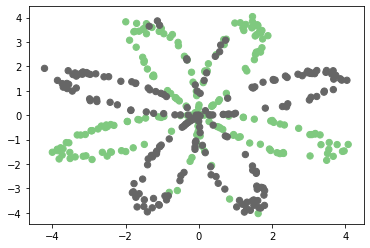

In [3]:
def make_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
        
    X = X
    y = y

    return X, y

X, y = make_planar_dataset()
print(X.shape, y.shape)
plt.scatter(X[:,0:1], X[:,1:2], c=y, cmap=cm.Accent, marker='o', s=40)

In [4]:
def initialize_weights(shape):
    np.random.seed(16180)
    return np.random.randn(shape[0], shape[1]) * 0.1

def sigmoid(x):
    return 1/(1+np.e**-x)

def predict(X, W0, b0, W1, b1):
    a1 = sigmoid(X.dot(W0) + b0)
    h = sigmoid(a1.dot(W1) + b1)
    return (h>0.5) + 0

def nn_model(X, y, input_layer_size, hidden_layer_size, K, iterations=1000, learning_rate=1.2):
    m = X.shape[0]

    W0 = tf.Variable(initialize_weights((input_layer_size, hidden_layer_size)))
    b0 = tf.Variable(np.zeros((1, hidden_layer_size)))
    W1 = tf.Variable(initialize_weights((hidden_layer_size, K)))
    b1 = tf.Variable(np.zeros((1, K)))

    # print(X.shape, W0.shape, b0.shape, W1.shape, b1.shape)

    a1 = tf.sigmoid(tf.matmul(X, W0) + b0)
    h = tf.sigmoid(tf.matmul(a1, W1) + b1)

    cost = tf.log(h)*y + tf.log(1-h)*(1-y)
    cost = -1/m*tf.reduce_sum(cost)

    train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    start_time = time.time()
    costs = []
    with tf.Session() as s:
        s.run(init)        
        for i in range(iterations):
            _, W0_f, b0_f, W1_f, b1_f, cost_f = s.run([train, W0, b0, W1, b1, cost])
            if i%10 == 0:
                costs.append(cost_f)
    end_time = time.time()
    
    return W0_f, b0_f, W1_f, b1_f, costs, end_time-start_time

In [5]:
def plot_decision_boundary(X, y, W0, b0, W1, b1):    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    samples = 500
    xx = np.linspace(x_min, x_max, samples)
    yy = np.linspace(y_min, y_max, samples)
    xx, yy = np.meshgrid(xx, yy)
    z = np.c_[xx.ravel(), yy.ravel()]
    z = predict(z, W0, b0, W1, b1)
    z = z.reshape((samples, samples))
    plt.contourf(xx, yy, z, alpha=0.3, cmap=cm.BuGn)
    plt.scatter(X[:,0:1], X[:,1:2], c=y, cmap=cm.Accent, marker='o', s=40)

       Execution time: 2.060 seconds.
  Prediction Accuracy: 64.000.
 Sum of final weights: -6.48217, -0.45929, 3.29953, -1.61825

       Execution time: 5.046 seconds.
  Prediction Accuracy: 87.000.
 Sum of final weights: -2.00227, -0.55431, 6.45075, -3.16350



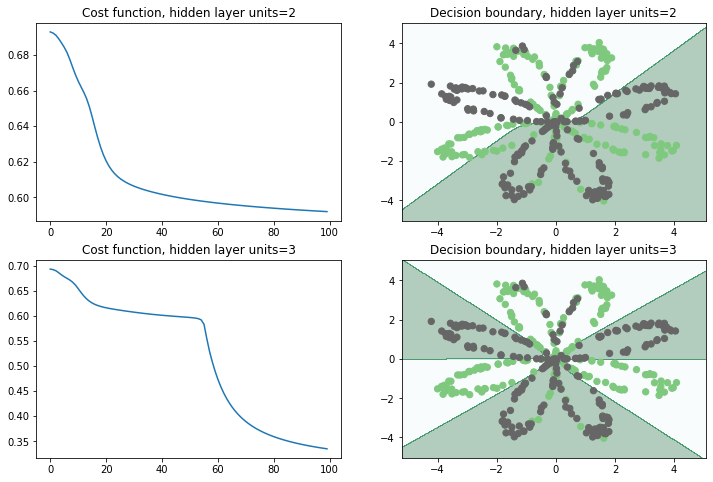

In [6]:
hl_units = [2, 3]
plt.figure(figsize=(12,len(hl_units)*4))
for i in range(len(hl_units)):    
    W0_f, b0_f, W1_f, b1_f, costs, execution_time = nn_model(X, y, X.shape[1], hl_units[i], 1)
    print(f"{'Execution time:':>22} {execution_time:0.3f} seconds.")
    y_predicted = predict(X, W0_f, b0_f, W1_f, b1_f)
    print(f"{'Prediction Accuracy:':>22} {np.mean(y == y_predicted)*100:0.3f}.")
    print(f"{'Sum of final weights:':>22} {np.sum(W0_f):0.5f}, {np.sum(b0_f):0.5f}, " + 
          f"{np.sum(W1_f):0.5f}, {np.sum(b1_f):0.5f}")
    
    plt.subplot(len(hl_units), 2, (i*2)+1)
    plt.title(f"Cost function, hidden layer units={hl_units[i]}")
    plt.plot(costs)
    
    plt.subplot(len(hl_units), 2, (i*2)+2)
    plt.title(f"Decision boundary, hidden layer units={hl_units[i]}")
    plot_decision_boundary(X, y, W0_f, b0_f, W1_f, b1_f)
    
    print()
plt.show()